# AutoEncoders for Image Denoising

## Importing the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing the MNIST dataset

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


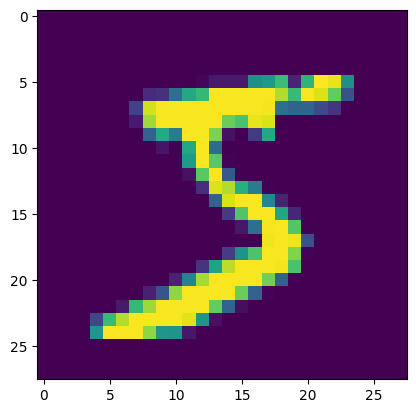

In [3]:
plt.imshow(X_train[0])

## Feature Scaling

In [4]:
X_train = X_train/255
X_test = X_test/255

## Building the Denoising AutoEncoder

In [5]:
from keras.utils import set_random_seed
from keras.models import Sequential
from keras.layers import Dense,Flatten,Reshape,GaussianNoise

In [6]:
X_train.shape

(60000, 28, 28)

### Building the Encoder with Added Noises

In [7]:
set_random_seed(1234)
encoder = Sequential()
encoder.add(Flatten())

# Adding noises only in the training mode
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(25,activation="relu"))

### Building the Decoder

In [8]:
set_random_seed(1234)
decoder = Sequential()
decoder.add(Dense(28 * 28,  activation="sigmoid"))
decoder.add(Reshape((28, 28)))

### Building the AutoEncoder

In [9]:
noise_remover = Sequential([encoder, decoder])

### Compiling the AutoEncoder

In [10]:
noise_remover.compile(optimizer='adam', loss="mse")

### Fitting the AutoEncoder to the Training set and evaluating it on the Test set

In [11]:
history = noise_remover.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0575 - val_loss: 0.0200
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0202 - val_loss: 0.0153
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0171 - val_loss: 0.0142
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0164 - val_loss: 0.0140
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0162 - val_loss: 0.0139
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0161 - val_loss: 0.0138
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0160 - val_loss: 0.0137
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0160 - val_loss: 0.0137
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0159 - val_loss: 0.0136
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0159 - val_loss: 0.0136


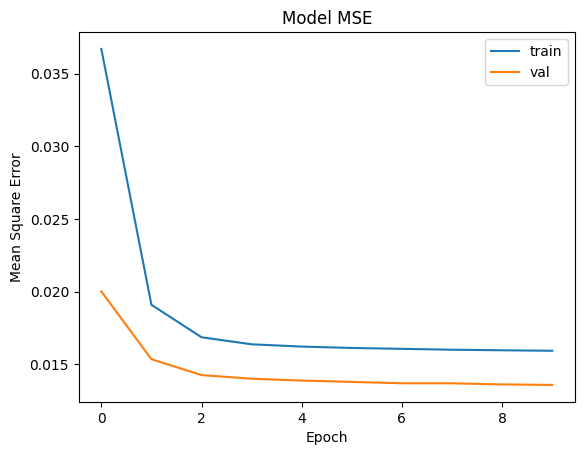

In [12]:
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

## Using the AutoEncoder to Denoise Noisy Test Images

In [13]:
n = 10
sample = GaussianNoise(0.2)
noisy_images = sample(X_test[0:n],training=True)

# Applying the denoising autoencoder only to noisy images
denoised = noise_remover.predict(noisy_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


The Original


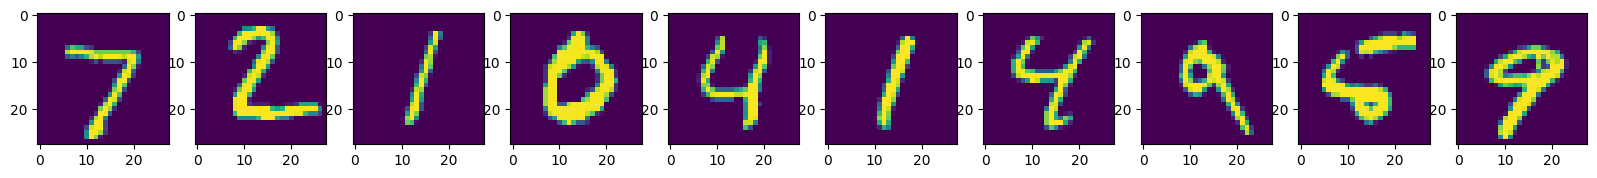

The noisy Version


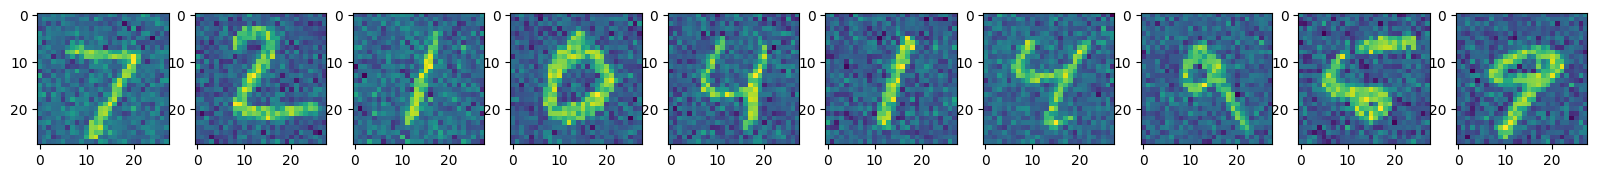

After going through denoiser


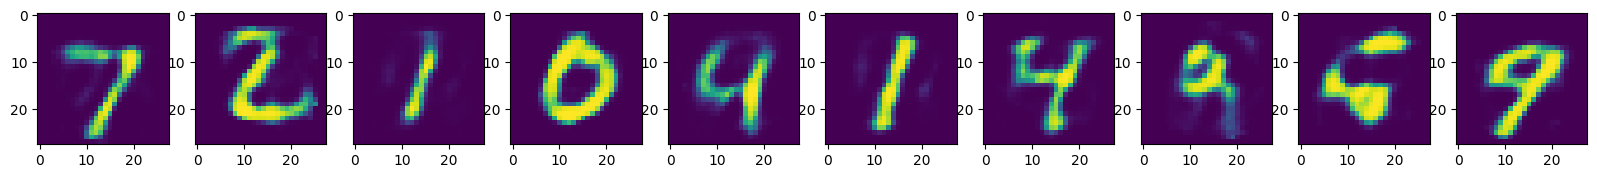

In [14]:
plt.figure(figsize=(20, 4))
print("The Original")
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i])
plt.show()

plt.figure(figsize=(20, 4))
print("The noisy Version")
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(noisy_images[i])
plt.show()

plt.figure(figsize=(20, 4))
print("After going through denoiser")
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(denoised[i])
plt.show()